Importing the Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\rehan\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\rehan\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\rehan\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
df=pd.read_csv('depression_dataset_reddit.csv')
df.head()

,clean_text,is_depression
0,we understand that most people who reply immed...,1
1,welcome to r depression s check in post a plac...,1
2,anyone else instead of sleeping more when depr...,1
3,i ve kind of stuffed around a lot in my life d...,1
4,sleep is my greatest and most comforting escap...,1


In [3]:
df.tail()

,clean_text,is_depression
7726,is that snow,0
7727,moulin rouge mad me cry once again,0
7728,trying to shout but can t find people on the list,0
7729,ughh can t find my red sox hat got ta wear thi...,0
7730,slept wonderfully finally tried swatching for ...,0


Grpahs and plots

c:\Users\rehan\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='is_depression', ylabel='count'>

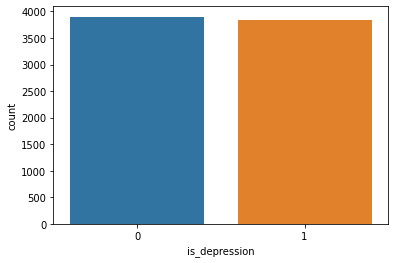

In [4]:
#PLotting the count of each class
sns.countplot(df['is_depression'])


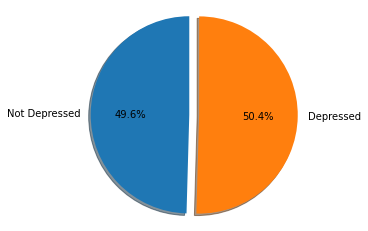

In [5]:
plt.rcParams['figure.facecolor'] = 'white'
labels = 'Not Depressed', 'Depressed'
sizes = [df['is_depression'].value_counts()[1],df['is_depression'].value_counts()[0]]
explode = (0, 0.1) 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

Input other libraries and necessary files

In [6]:
import re
import nltk
nltk.download('omw-1.4')
nltk.download('wordnet')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\rehan\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rehan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [7]:
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rehan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Lemmatization

In [8]:
lemmatize=nltk.WordNetLemmatizer()

In [9]:
corpus=[]
for i in range(0,len(df)):
    review=re.sub('[^a-zA-Z]',' ',df['clean_text'][i])
    review=review.lower()
    review=review.split()
    review=[lemmatize.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review=' '.join(review)
    corpus.append(review)

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

In [11]:
count=CountVectorizer(stop_words="english",max_features=550)#it removes unnecesarry words and finds most using 550 words
X=count.fit_transform(corpus).toarray()
import pickle
pickle.dump(count,open('count.pkl','wb'))

In [12]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

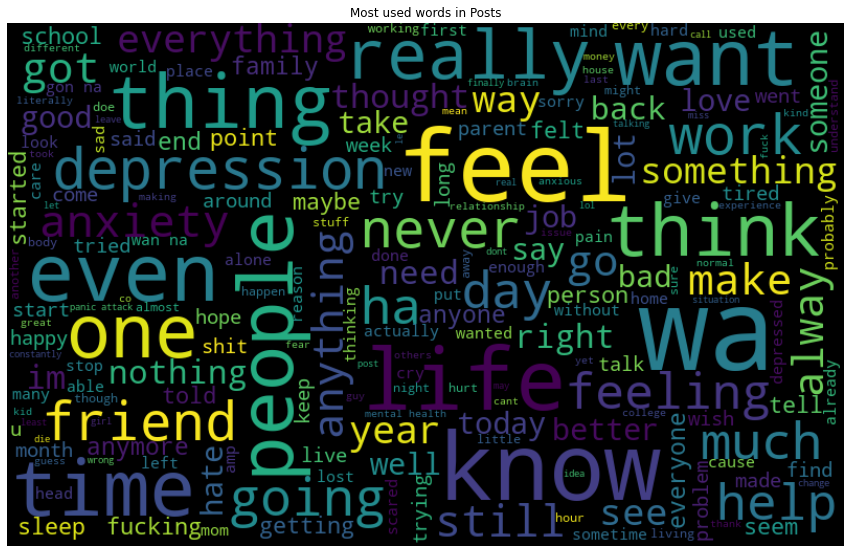

In [13]:
#We need convert all reivews to single text
all_words=' '.join([text for text in corpus])
wordcloud=WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(all_words)
plt.figure(figsize=[15,15])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most used words in Posts") 
plt.show()

In [14]:
matrix=count.fit_transform(corpus).toarray()
matrix

array([[1, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

Defining the target and attributes

In [15]:
x=matrix
y=df["is_depression"]

Spliting  X and y into training and testing sets

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,shuffle=True,random_state=42,stratify=y)


In [16]:
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

In [23]:
#implementing LSTM
model=Sequential()
model.add(Embedding(550,128,input_length=550))
model.add(LSTM(128,dropout=0.2,recurrent_dropout=0.2))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 550, 128)          70400     
                                                                 
 lstm_2 (LSTM)               (None, 128)               131584    
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 202,113
Trainable params: 202,113
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
97/97 [==============================] - 454s 5s/step - loss: 0.6794 - accuracy: 0.5757 - val_loss: 0.6710 - val_accuracy: 0.6361
Epoch 2/10
97/97 [==============================] - 424s 4s/step - loss: 0.6591 - accuracy: 0.6381 - val_loss: 0.6276 - val_accuracy: 0.7027
Epoch 3/10
97/97 [==============================] - 418s 4s/step - loss: 0.5994 - accuracy: 0.7081 - val_loss: 0.6134 - val_accuracy: 0.7201
Epoch 4/10
97/97 [==============================] - 424s 4s/step - loss: 0.5653 - accuracy: 0.7233 - val_loss: 0.5660 - val_accuracy: 0.6865
Epoch 5/10
97/97 [==============================] - 422s 4s/step - loss: 0.5054 - accuracy: 0.7549 - val_loss: 0.5467 - val_accuracy: 0.7602
Epoch 6/10
97/97 [==============================] - 493s 5s/step - loss: 0.4128 - accuracy: 0.8218 - val_loss: 0.3964 - val_accuracy: 0.8268
Epoch 7/10
97/97 [==============================] - 508s 5s/step - loss: 0.4085 - accuracy: 0.8158 - val_loss: 0.3688 - val_accuracy: 0.8429
Epoch 8/10
97

<AxesSubplot:>

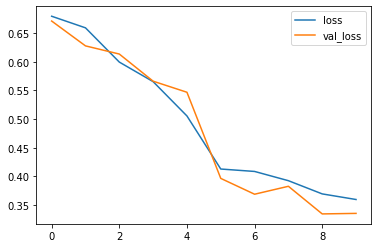

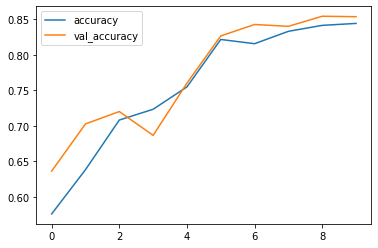

In [27]:
history=model.fit(x_train,y_train,batch_size=64,epochs=10,validation_data=(x_test,y_test))
history=pd.DataFrame(history.history)
history.loc[:,['loss','val_loss']].plot()
history.loc[:,['accuracy','val_accuracy']].plot()

In [28]:
model.evaluate(x_test,y_test)

49/49 [==============================] - 16s 321ms/step - loss: 0.3354 - accuracy: 0.8539


[0.3353537917137146, 0.8539108037948608]

In [29]:
#saving the model
model.save('model.h5')

49/49 [==============================] - 15s 304ms/step


<AxesSubplot:>

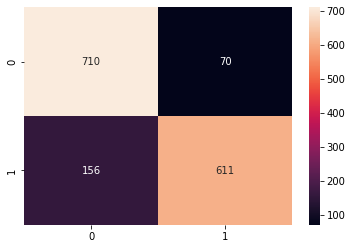

In [32]:
#plot confusion matrix
from sklearn.metrics import confusion_matrix
y_pred=model.predict(x_test)
y_pred=(y_pred>0.5)
cm=confusion_matrix(y_test,y_pred.round())
sns.heatmap(cm,annot=True,fmt='d')

In [33]:
sample="There are people in social media enjoying there life, are rich as hell and have made more money in a day than I will in my entire life. Yet here I am struggling, jobless actually avoiding working for my families sake while this pandemic goes on. Either way I just feel like a failure, I'd love to be rich doesn't everyone? Yet I just don't have the confidence or see myself ever making it. I have a degree in computer networking too, yet I've only had one IT related job since then and it was pretty basic and poor pay and I eventually lost the job. Being an extreme introvert really doesn't help in social life, job life and if you are an introvert I'd say there's probably less chance of being rich and successful though obviously it isn't impossible. My life is in no means actually bad though I have it fairly okay, even if I am eventually going to have to get a job if my money gets too low. It just sucks feeling the way I do and feeling like a failure."

In [34]:
#lemmatize the sample
sample=re.sub('[^a-zA-Z]',' ',sample)
sample=sample.lower()
sample=sample.split()
sample=[lemmatize.lemmatize(word) for word in sample if not word in stopwords.words('english')]
sample=' '.join(sample)


In [35]:
#convert sample to matrix
sample=count.transform([sample]).toarray()
sample

array([[0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1,
        0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 5, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
        1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 

In [37]:
#predict the sample
model.predict(sample)
prediction=model.predict(sample)
prediction=(prediction>0.5)
prediction
if prediction==1:
    print("Depressed")
else:
    print("Not Depressed")
    

1/1 [==============================] - 0s 375ms/step
Depressed
